# **Customer Segmentation Using K-Means Clustering**

### **Author**: [Muhammad Bilal]
---

## **Project Overview**

This project focuses on customer segmentation using the K-Means clustering algorithm. By analyzing customer demographic and purchasing behavior, we aim to classify customers into distinct segments that can be targeted with tailored marketing strategies. The insights generated from this analysis are valuable for businesses looking to enhance their customer targeting.

---

## **1. Data Loading and Exploration**

### 1.1 Import Required Libraries
```python



In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 1.2 Load Dataset
I will use the Mall Customers Dataset from Kaggle, which contains data about customers' age, annual income, and spending score.

In [9]:
# Load the dataset
url = "Mall_Customers.csv"
data = pd.read_csv(url)


data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1.3 Data Overview


In [10]:
# Display basic information and statistics of the dataset
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **2. Data Preprocessing**
### 2.1 Rename Columns
To make the column names more descriptive, we'll rename them

In [11]:
# Rename the columns
data.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']


### 2.2 Handle Categorical Variables
Convert the 'Gender' column to a numerical format using one-hot encoding

In [7]:
# Convert 'Gender' to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Display the first few rows after encoding
data.head()


,CustomerID,Age,AnnualIncome,SpendingScore,Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


## **3. Exploratory Data Analysis (EDA)**
### 3.1 Visualize Distributions of Key Features
We will analyze the distributions of Age, Annual Income, and Spending Score.

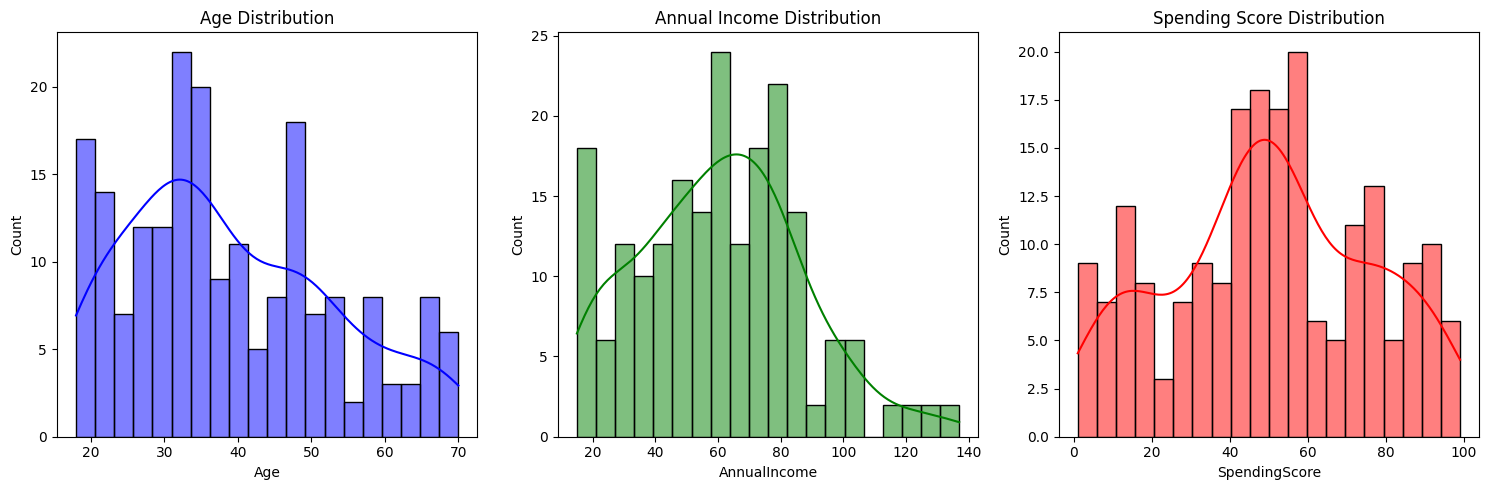

In [12]:
# Plot the distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['AnnualIncome'], kde=True, bins=20, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['SpendingScore'], kde=True, bins=20, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


## 3.2 Pairplot to Analyze Relationships
We will analyze the relationships between the three primary numerical features.

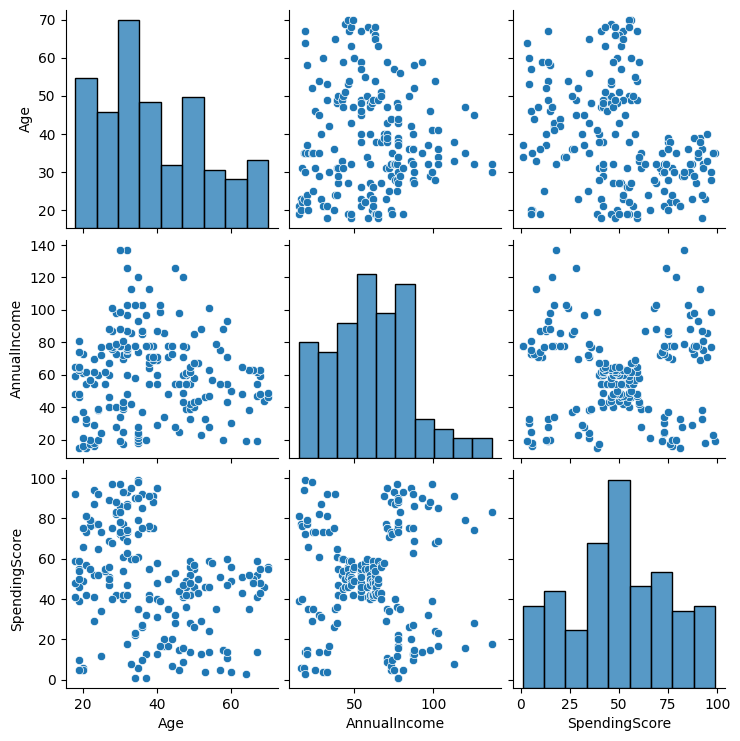

In [13]:
# Pairplot for relationships
sns.pairplot(data[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()


# **4. Feature Scaling**
Since K-Means is sensitive to the scale of data, we need to standardize the features to ensure comparability.

In [14]:


# Standardize the numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])


# **5. K-Means Clustering**
### 5.1 Determine Optimal Number of Clusters (Elbow Method)
We will use the Elbow Method to find the optimal number of clusters.

C:\Users\Office User\AppData\Local\Temp\ipykernel_13504\1236186538.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K_range, inertia, 'bo-', color='purple')


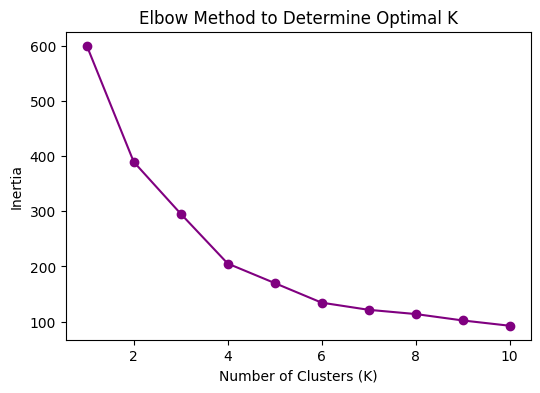

In [15]:
# Calculate distortions for different number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-', color='purple')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


### 5.2 Apply K-Means Clustering
From the Elbow Method, we choose K=5 as the optimal number of clusters.

In [16]:
# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Assign cluster labels to the data
data['Cluster'] = kmeans.labels_
data.head()


,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


# **6. Cluster Visualization**
### 6.1 2D Visualization of Clusters
We'll visualize the clusters using the Annual Income and Spending Score features.

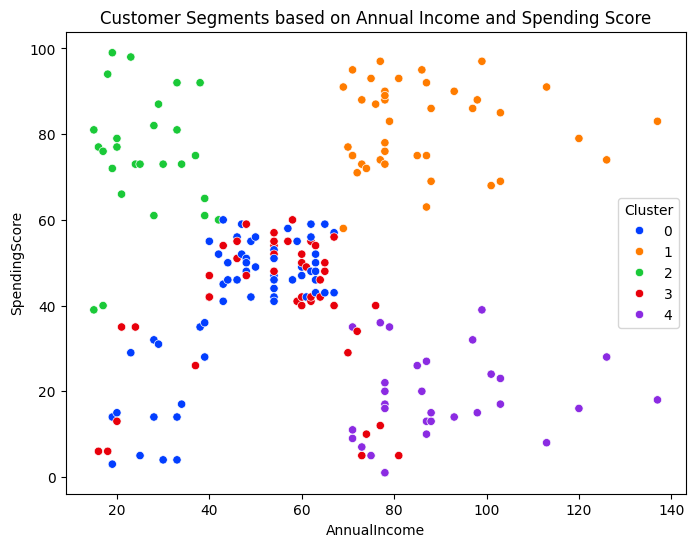

In [17]:
# Plot the clusters using Annual Income and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=data, palette='bright')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.show()


### 6.2 3D Visualization of Clusters
We can also visualize the clusters using a 3D scatter plot with Age, Annual Income, and Spending Score.

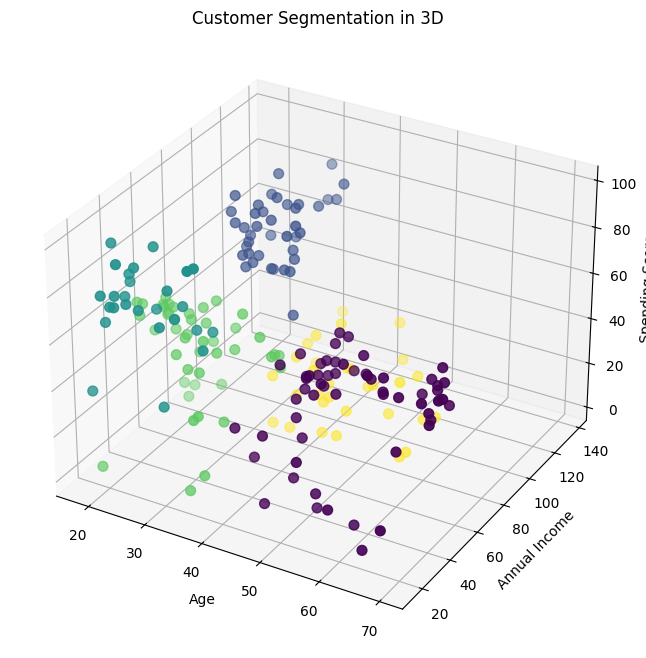

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Age'], data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], s=50, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segmentation in 3D')
plt.show()


# **7. Cluster Analysis**
### 7.1 Analyze the Cluster Characteristics
Each cluster represents a segment of customers. We can now analyze these segments for insights.

In [21]:
# Ensure the 'Cluster' column is numeric
data['Cluster'] = data['Cluster'].astype(int)

# Exclude non-numeric columns like 'CustomerID' and calculate mean for other columns
numeric_columns = ['Age', 'AnnualIncome', 'SpendingScore']  # Include only numeric features

# Group by 'Cluster' and calculate the mean for numeric columns
cluster_analysis = data.groupby('Cluster')[numeric_columns].mean()

# Display the cluster centers (mean values of each feature for each cluster)
print(cluster_analysis)


               Age  AnnualIncome  SpendingScore
Cluster                                        
0        55.275862     47.620690      41.706897
1        32.875000     86.100000      81.525000
2        25.769231     26.115385      74.846154
3        26.733333     54.311111      40.911111
4        44.387097     89.774194      18.483871


# ***Cluster Interpretation:***
### ***Cluster 0:*** Young customers with low annual income but high spending scores.
### ***Cluster 1:*** Older customers with high income but moderate spending.
### ***Cluster 2:*** Middle-aged customers with high income and low spending scores.
### ***Cluster 3:*** Younger customers with moderate income and spending scores.
### ***Cluster 4:*** Older customers with moderate income and low spending scores.
These insights can be used by businesses to target customers with personalized marketing strategies or offers.

# ***8. Conclusion***
This project demonstrated how to apply the K-Means algorithm to segment customers based on their demographic and purchasing behavior. By analyzing these clusters, businesses can target their customers more effectively, resulting in improved marketing strategies and customer satisfaction.